### According to Wikkipedia In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set .An outlier can cause serious problems in statistical analyses.
#### There are some methods to handle the outliers


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Car details v3-copy1.csv")

In [3]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [4]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


C:\Users\IQD DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

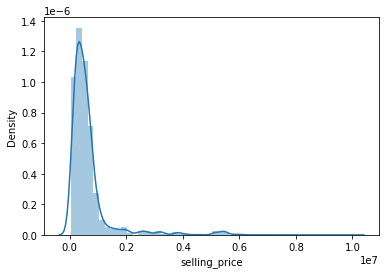

In [5]:
sns.distplot(df["selling_price"])

## Z_score method

### If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. For example, in a survey, it was asked how many children a person had. Clearly, 15 is an outlier in any dataset.
✔✔✔✔✔

 After the 3 std deviation a value can be consider as a outlier
 
 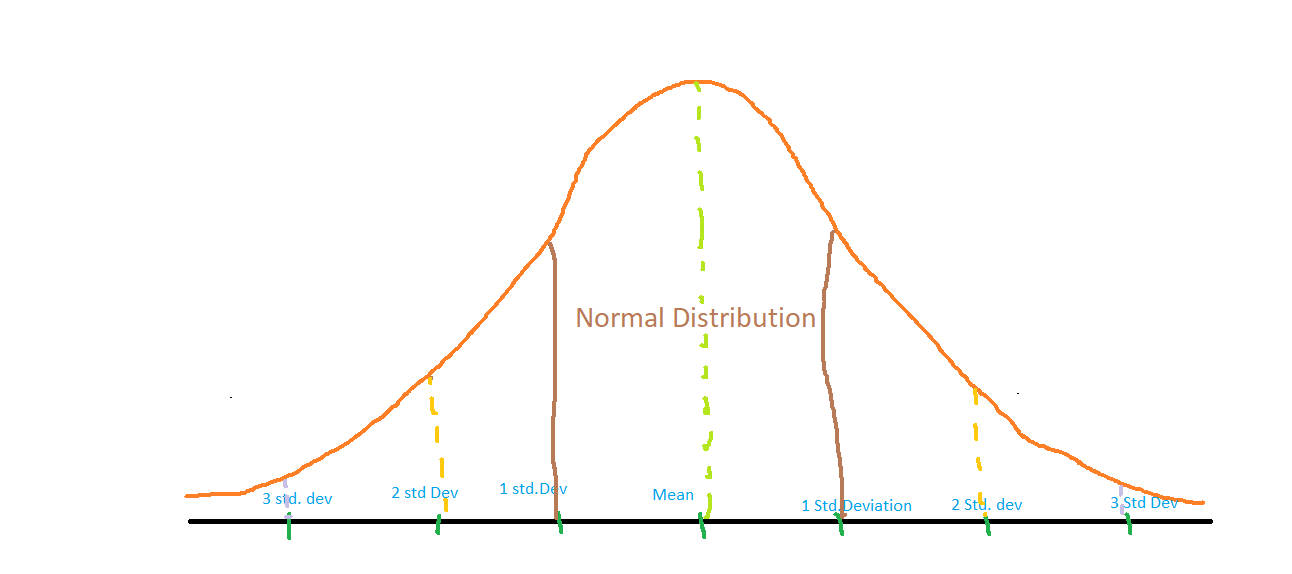
 

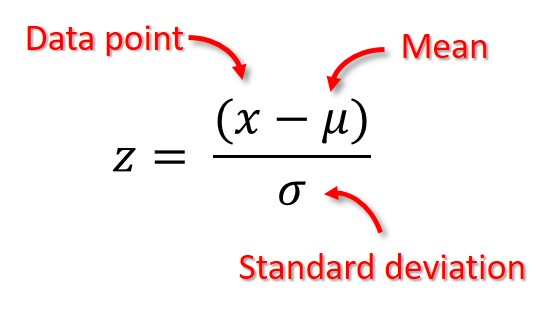

## When to use z score -when data follows normal distribution

In [ ]:
def outlier(df):
    outlier_index=[]
    sp_mean=np.mean(df["selling_price"])
    sp_std=np.std(df["selling_price"])
    for index in range(len(df["selling_price"])):
        z_score=(df["selling_price"][index]-sp_mean)/sp_std
        if np.abs(z_score)>3:
            outlier_index.append(index)
    return outlier_index
    
a=outlier(df)
          
 

In [7]:
print(a)

[131, 132, 133, 134, 135, 136, 137, 139, 145, 148, 170, 288, 371, 372, 374, 384, 385, 410, 411, 413, 423, 424, 647, 648, 650, 660, 661, 1057, 1071, 1078, 1079, 1081, 1091, 1092, 1097, 1098, 1100, 1110, 1111, 1116, 1117, 1119, 1129, 1130, 1135, 1136, 1138, 1148, 1149, 1530, 1561, 1562, 1563, 1564, 1710, 1711, 1713, 1723, 1724, 1821, 1828, 1830, 1834, 1857, 1858, 1859, 1860, 1871, 1872, 1979, 1993, 2631, 2632, 2634, 2644, 2645, 2664, 2665, 2667, 2677, 2678, 2705, 2829, 2938, 3079, 3080, 3082, 3092, 3093, 3236, 3237, 3238, 3239, 3240, 3241, 3248, 3251, 3409, 3410, 3412, 3422, 3423, 3517, 3518, 3520, 3530, 3531, 3832, 3833, 3835, 3845, 3846, 4083, 4101, 4216, 4217, 4219, 4229, 4230, 4235, 4236, 4238, 4248, 4249, 4256, 4257, 4259, 4269, 4270, 4321, 4322, 4324, 4334, 4335, 4364, 4415, 4416, 4418, 4428, 4429, 4671, 4753, 4766, 4816, 4817, 4819, 4829, 4830, 4950, 4951, 4952, 5084, 5085, 5087, 5097, 5098, 5188, 5245, 5246, 5247, 5248, 5252, 5253, 5256, 5257, 5258, 5259, 5511, 5615, 5616, 5618, 

## Inter Qunatile Range -It is works on Box plot

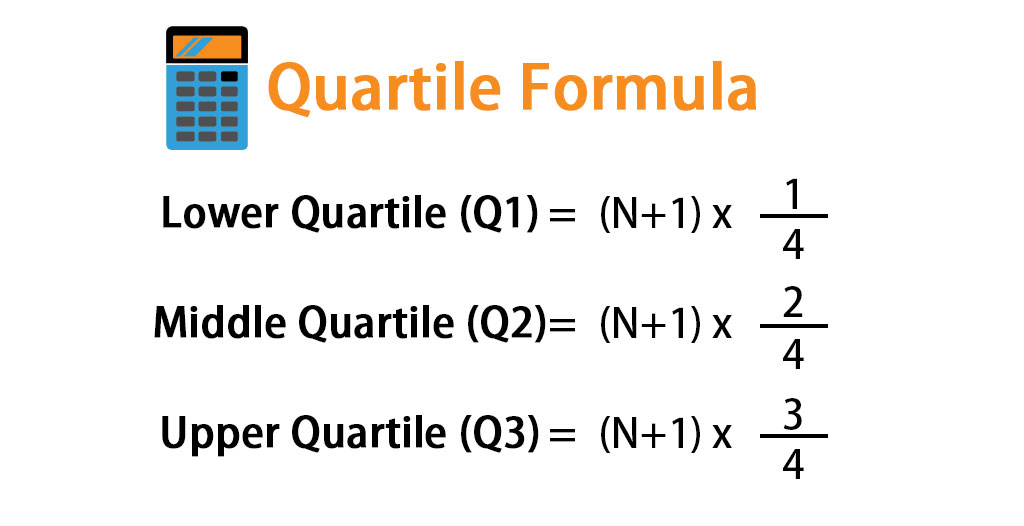

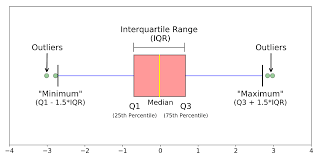

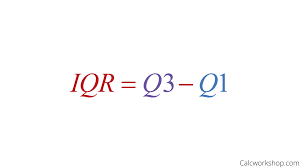
# Minimum = Q1-(1.5*IQR)
# Maximum=Q3+(1.5*IQR)
### The values which are above the Below minimum and above maximum can be considered as outlier as we can see in above image

In [12]:
def out(df):
    quant1,quant3=np.percentile(df["selling_price"],[25,75])
    IQR=quant3-quant1

    lower_limit = quant1-(1.5*IQR)
    upper_limit=quant3+(1.5*IQR)

    print(lower_limit,upper_limit)

    outlier_index=[]
    for i in range(len(df["selling_price"])):
        if df["selling_price"][i]>upper_limit or df["selling_price"][i]<lower_limit:
            outlier_index.append(i)
    return  outlier_index
    
outlier_index=out(df)  

-375002.5 1305001.5


In [13]:
print(outlier_index)

[41, 47, 49, 55, 57, 58, 59, 60, 75, 82, 110, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 148, 151, 156, 158, 163, 165, 166, 167, 170, 187, 257, 288, 350, 362, 370, 371, 372, 374, 375, 384, 385, 388, 409, 410, 411, 413, 414, 423, 424, 427, 452, 468, 470, 526, 550, 569, 595, 600, 646, 647, 648, 650, 651, 660, 661, 664, 681, 742, 906, 970, 1007, 1039, 1057, 1060, 1063, 1064, 1065, 1066, 1067, 1071, 1073, 1075, 1077, 1078, 1079, 1081, 1082, 1091, 1092, 1095, 1096, 1097, 1098, 1100, 1101, 1110, 1111, 1114, 1115, 1116, 1117, 1119, 1120, 1129, 1130, 1133, 1134, 1135, 1136, 1138, 1139, 1148, 1149, 1152, 1255, 1360, 1397, 1410, 1530, 1540, 1561, 1562, 1563, 1564, 1572, 1586, 1590, 1636, 1674, 1676, 1689, 1709, 1710, 1711, 1713, 1714, 1723, 1724, 1727, 1748, 1752, 1767, 1821, 1828, 1830, 1834, 1835, 1857, 1858, 1859, 1860, 1863, 1871, 1872, 1906, 1923, 1969, 1977, 1978, 1979, 1980, 1984, 1989, 1990, 1993, 1994, 2012, 2038, 2106, 2109, 2129, 2131, 2135, 2137, 2229, 2397

## When to use IQR-If Data doed not follows normal distribution

## Box plot

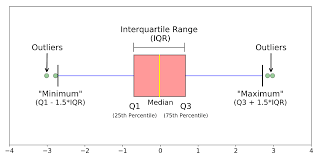

C:\Users\IQD DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

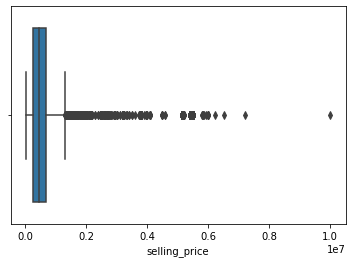

In [63]:
sns.boxplot(df["selling_price"])